In [51]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [52]:
def mape(predictions, dtrain):
    ground_truth = dtrain.get_label()
    one_over_n = 1/len(predictions)
    at_mean = sum(ground_truth)/len(ground_truth)
    sommatoria = sum(np.abs(ground_truth - predictions)) / at_mean
    return 'mape', one_over_n * sommatoria

In [53]:
dataset = pd.read_csv('dataset/output/dataset_polimi_extended_with_province.csv',delimiter=',')
dataset = dataset.round({'gini_index': 4, 'forza_lavoro': 4, 'occupazione' : 4})

In [54]:
train_set = dataset[dataset['timestamp']<1462838400]
test_set = dataset[dataset['timestamp']>=1462838400]

In [55]:
y_train = train_set.pop('vendite')
t_train = test_set.pop('vendite')

In [56]:
xgdmat = xgb.DMatrix(train_set,y_train, missing=np.nan)
dtest = xgb.DMatrix(test_set, t_train, missing=np.nan)

In [57]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':10, 'min_child_weight':10} 

# Questo dictionary verra popolato con tutti i risultati della MAPE del train e 
# test set computati ad ogni iterazione
dic = {}

# Ad ogni iteraziore, voglio 'guardare' questi due dataset e valutarli con la funzione
# passata in feval
watchlist = [(xgdmat,'train'),(dtest,'test')]

final_gb = xgb.train(our_params, xgdmat, 155, evals = watchlist, feval = mape, evals_result = dic)

[0]	train-mape:0.825136	test-mape:0.815599
[1]	train-mape:0.757365	test-mape:0.736671
[2]	train-mape:0.712362	test-mape:0.694175
[3]	train-mape:0.659557	test-mape:0.638481
[4]	train-mape:0.613497	test-mape:0.590569
[5]	train-mape:0.575763	test-mape:0.545699
[6]	train-mape:0.544611	test-mape:0.514463
[7]	train-mape:0.517116	test-mape:0.483663
[8]	train-mape:0.493131	test-mape:0.458386
[9]	train-mape:0.475147	test-mape:0.440196
[10]	train-mape:0.455916	test-mape:0.417914
[11]	train-mape:0.443471	test-mape:0.40643
[12]	train-mape:0.432156	test-mape:0.39605
[13]	train-mape:0.419049	test-mape:0.381744
[14]	train-mape:0.407219	test-mape:0.371968
[15]	train-mape:0.396179	test-mape:0.362927
[16]	train-mape:0.386624	test-mape:0.355823
[17]	train-mape:0.381458	test-mape:0.354312
[18]	train-mape:0.373313	test-mape:0.348998
[19]	train-mape:0.366188	test-mape:0.343601
[20]	train-mape:0.359671	test-mape:0.339791
[21]	train-mape:0.355064	test-mape:0.33621
[22]	train-mape:0.34958	test-mape:0.331186
[2

In [58]:
min(dic['train']['mape'])

0.240491

In [59]:
min(dic['test']['mape'])

0.263776

In [60]:
# Prediction sul test set
# Ground truth: 8 8 10 7 0 0 10 8 9 4
testdmat = xgb.DMatrix(test_set, missing=np.nan)
y_pred = final_gb.predict(testdmat) 
y_pred[:10]

array([ 8.85164738,  8.90080357,  8.49688625,  8.54498386,  2.45766139,
        1.03730237,  8.56097126,  8.17136192,  8.18850517,  7.61894608], dtype=float32)

In [61]:
def mape_noxgb(predictions, dtrain):
    ground_truth = dtrain#.get_label()
    one_over_n = 1/len(predictions)
    at_mean = sum(ground_truth)/len(ground_truth)
    sommatoria = sum(np.abs(ground_truth - predictions)) / at_mean
    return 'mape', one_over_n * sommatoria

In [62]:
round_pred = list(map(lambda x: round(x), y_pred))
mape_noxgb(round_pred,t_train)

('mape', 0.24803941282927811)

In [63]:
mape_noxgb(y_pred,t_train)

('mape', 0.26377567946731079)

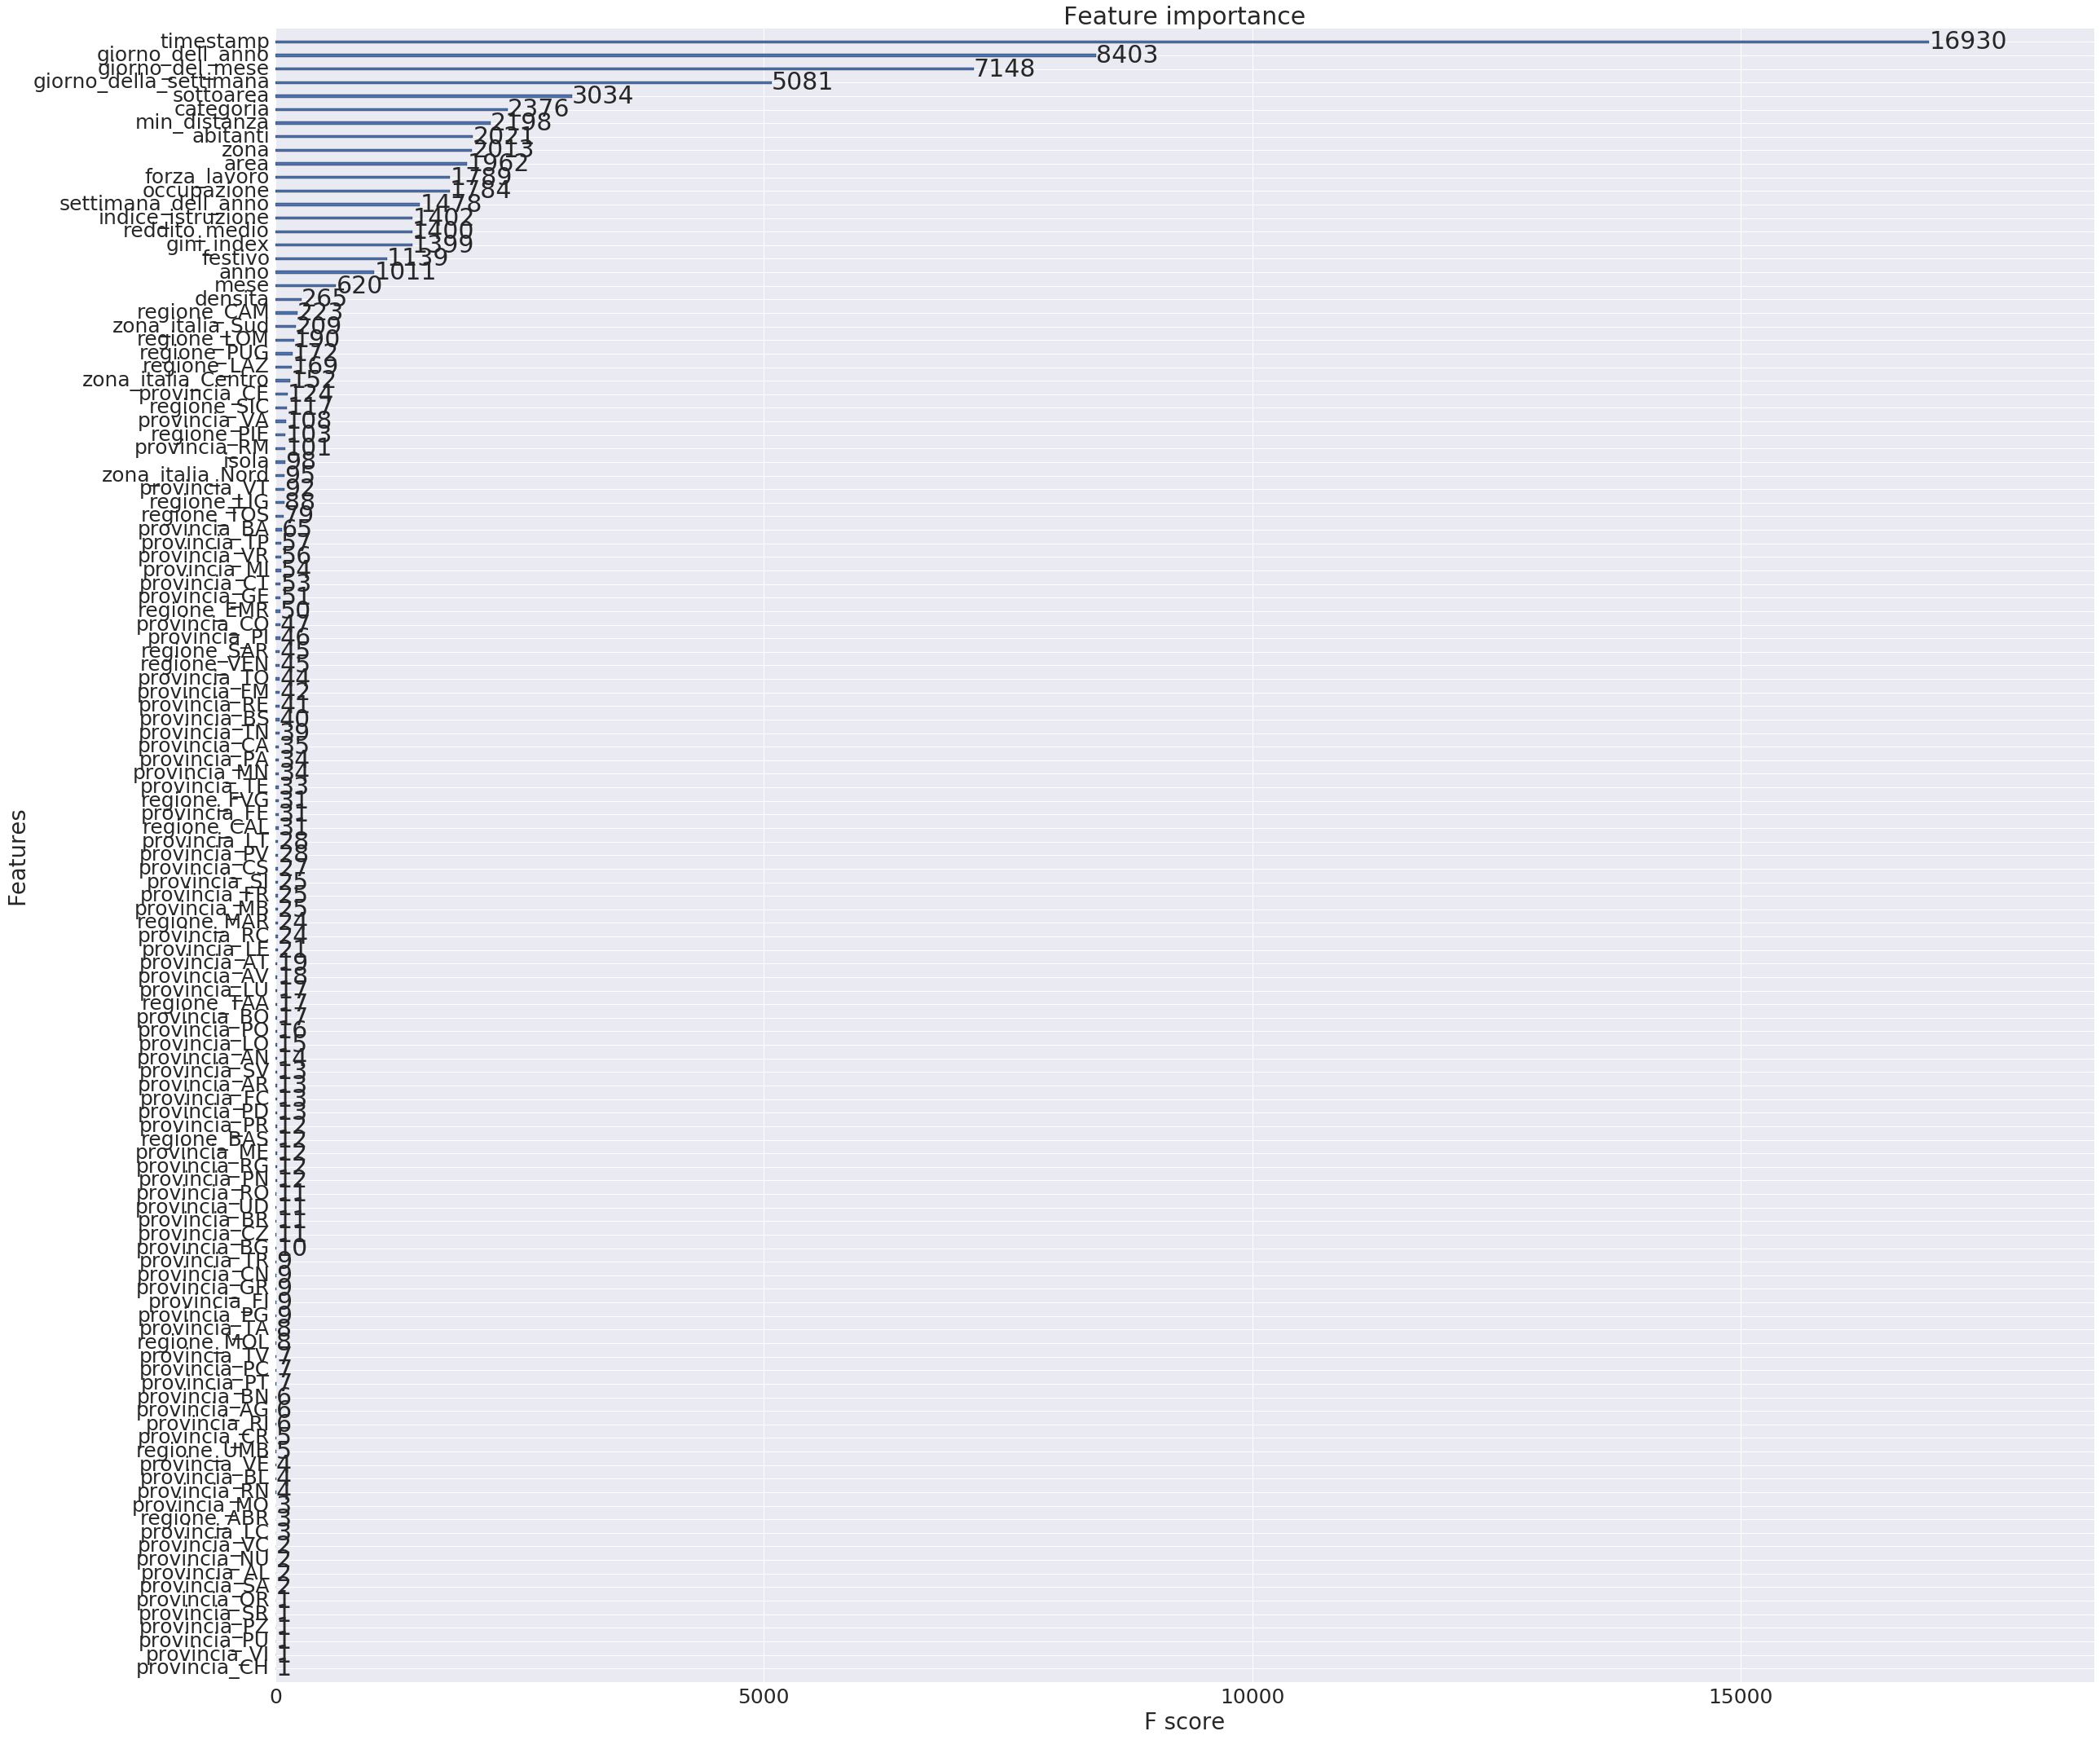

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 2.5)
fig = plt.figure(figsize=(40, 80))
ax = fig.add_subplot(211)
p = xgb.plot_importance(final_gb, ax = ax)